# SPAC Data Analysis

## Problem Statement


2020 have seen a surge in SPAC transactions -- more and more companies choose to go public via this mechanism instead of tradtional IPO. And investors are now considering should they invest in a SPAC? Which SPAC might be interesting? 

As a reminder, SPAC is a blank-check company. When it goes public, the company has no business operations at all. The only purpose of raised fund is to acquire another company. Hence, we cannot analyse SPAC companies with traditional metrics like financianl information or KPI. 

Our goal is to look at these operations and analyse several important attributes, including raised capital, sector, market cap and ARR etc. Specifically, I'd like to know which factor has most influence on ARR. And we can use our results to make future investment decision. 

## Data getting and cleaning

Luckily, there are wonderful online data bases that keep track of SPAC, like SPACinsider, SPAC Track etc.

https://spactrack.net/closedspacs/: this list contains recent completed SPACs (from 2019 onwards), as well as a collection of SPACs going back as far as 2013 that include serial sponsors.

https://spacinsider.com/stats/: this list contains 500+ SPACs that go public since 2019. However, most of them are searching for target for the moment and ticker listed here is SPAC ticker. 

The simplest approache to get these data is to copy paste the data, put them into excel, then generate CSV file. (I admit it's the easiest way for me)


### Copy-paste : IT WORKS WELL!

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/spac_list_post.csv')
df

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,Warrant Link,SPAC IPO Date,SPAC IPO Size (M),SPAC Initial Target Industry,Notable Leadership / Sponsor,SPAC Underwriter(s),Status,Closing Press Release,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
0,GENI,Genius Sports Limited,NaN,"dMY Technology Group, Inc. II (DMYD)",2021/4/20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,WARRANT LINK,2020/8/13,$276.00,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,CLOSING PRESS RELEASE,NaN,2021/8/13,NaN
1,ASTS,AST SpaceMobile,NaN,New Providence Acquisition Corp (NPA),2021/4/6,NaN,-19.90%,-12.35%,$8.01,0.00%,"$229,425,000",Warrants Trading,WARRANT LINK,2019/9/11,$230.00,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,CLOSING PRESS RELEASE,NaN,2021/5/6,NaN
2,INVZ,"Innoviz Technologies, Inc.",NaN,Collective Growth Corp (CGRO),2021/4/5,NaN,-1.00%,-1.03%,$9.90,4.54%,"$188,223,742",Warrants Trading,WARRANT LINK,2020/5/1,$150.00,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,CLOSING PRESS RELEASE,NaN,2021/5/5,NaN
3,FOA,Finance of America Companies Inc.,NaN,Replay Acquisition Corp (RPLA),2021/4/1,NaN,0.00%,0.00%,$10.00,0.10%,NaN,Warrants Trading,WARRANT LINK,2019/4/3,$287.50,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,CLOSING PRESS RELEASE,NaN,2021/5/1,NaN
4,PSFE,Paysafe Limited,NaN,Foley Trasimene Acquisition Corp. II (BFT),2021/3/30,NaN,27.70%,41.10%,$12.77,-0.47%,NaN,Warrants Trading,WARRANT LINK,2020/8/18,"$1,467.00",NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,CLOSING PRESS RELEASE,NaN,2021/8/18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,GLG,GLG Partners,NaN,"Freedom Acquisition Holdings, Inc. (FRH)",2007/11/3,Acquired by Man Group (May 2010) for $1.6B (55...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006/12/22,$528.00,NaN,"Nicolas Berggruen (Berggruen Holdings),Martin ...","Citigroup, Ladenburg Thalmann & Co.",Non-Trading,CLOSING PRESS RELEASE,NaN,NaN,NaN
149,JAZ,"Jazz Technologies, Inc.","Jazz Semiconductor, Inc.",Acquicor Technology Inc. (AQR),2007/2/20,Merged with Tower Semiconductor (Sep 2008) for...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006/3/17,$172.50,"Tech, Multimedia, Networking","Steve Wozniak (Co-founder, Apple),Gil Amelio (...","Wedbush Morgan Securities, ThinkEquity Partners",Non-Trading,CLOSING PRESS RELEASE,NaN,NaN,NaN
150,JMBA,"Jamba, Inc.",Jamba Juice Company,Services Acquisition Corp. (SVI),2006/11/26,Acquired by Focus Brands (Sep 2019 - $200M),NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005/6/25,$138.00,"Services: Business, Healthcare, Consumer","Steven Berrard (Fmr Co-Founder/Co-CEO, AutoNat...",Broadband Capital Management,Non-Trading,CLOSING PRESS RELEASE,NaN,NaN,NaN
151,NHRX,"NationsHealth, Inc.",NaN,Millstream Acquisition Corporation (MSTM),2004/8/31,Acquired by ComVest Investment Partners III (J...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003/8/25,$24.20,NaN,Arthur Spector,"EarlyBirdCapital, Inc.",Non-Trading,CLOSING PRESS RELEASE,NaN,NaN,NaN


In [3]:
df.columns

Index(['Post-SPAC Ticker Symbol', 'Post-SPAC Company Name',
       'Merged Company Name (if Different than DeSPAC)', 'SPAC Name / Ticker',
       'Merger Completion Date (Announced)', 'Post-Completion Events',
       'Total Return (from SPAC IPO price)',
       'Annualized Return (from SPAC IPO)', 'Current Price ', '% Change Prev',
       'Market Cap', 'Warrant Trading Status', 'Warrant Link', 'SPAC IPO Date',
       'SPAC IPO Size (M)', 'SPAC Initial Target Industry',
       'Notable Leadership / Sponsor', 'SPAC Underwriter(s)', 'Status',
       'Closing Press Release', 'Merger Partner Leadership',
       'Est. Date Warrants Exercisable',
       'Warrant Exercise Deadline (if Called)'],
      dtype='object')

In [4]:
#The column name 'Current Price ' has one small space after the name, it can cause some problems afterwards
#I'd also like to make the column names more readable
#I also notice some useless columns and I will treat them later
column_name = ['Post-SPAC Ticker Symbol', 'Post-SPAC Company Name',
       'Merged Company Name (if Different than DeSPAC)', 'SPAC Name / Ticker',
       'Merger Completion Date (Announced)', 'Post-Completion Events',
       'Total Return (from SPAC IPO price)',
       'Annualized Return (from SPAC IPO)', 'Current Price', '% Change Prev',
       'Market Cap', 'Warrant Trading Status', 'Warrant Link', 'SPAC IPO Date',
       'SPAC IPO Size (M)', 'SPAC Initial Target Industry',
       'Notable Leadership / Sponsor', ' Underwriter(s)', 'Status',
       'Closing Press Release', 'Merger Partner Leadership',
       'Est. Date Warrants Exercisable',
       'Warrant Exercise Deadline (if Called)']
df.columns=column_name

In [5]:
#Delete useless columns
df.dropna(how='all',inplace=True)
df.drop(columns='Warrant Link',inplace=True)
df.drop(columns='Closing Press Release',inplace=True)
df.head()

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size (M),SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
0,GENI,Genius Sports Limited,NaN,"dMY Technology Group, Inc. II (DMYD)",2021/4/20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,2020/8/13,$276.00,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,NaN,2021/8/13,NaN
1,ASTS,AST SpaceMobile,NaN,New Providence Acquisition Corp (NPA),2021/4/6,NaN,-19.90%,-12.35%,$8.01,0.00%,"$229,425,000",Warrants Trading,2019/9/11,$230.00,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,NaN,2021/5/6,NaN
2,INVZ,"Innoviz Technologies, Inc.",NaN,Collective Growth Corp (CGRO),2021/4/5,NaN,-1.00%,-1.03%,$9.90,4.54%,"$188,223,742",Warrants Trading,2020/5/1,$150.00,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,NaN,2021/5/5,NaN
3,FOA,Finance of America Companies Inc.,NaN,Replay Acquisition Corp (RPLA),2021/4/1,NaN,0.00%,0.00%,$10.00,0.10%,NaN,Warrants Trading,2019/4/3,$287.50,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,NaN,2021/5/1,NaN
4,PSFE,Paysafe Limited,NaN,Foley Trasimene Acquisition Corp. II (BFT),2021/3/30,NaN,27.70%,41.10%,$12.77,-0.47%,NaN,Warrants Trading,2020/8/18,"$1,467.00",NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,NaN,2021/8/18,NaN


In [6]:
# Check data type of each column
df.dtypes

Post-SPAC Ticker Symbol                           object
Post-SPAC Company Name                            object
Merged Company Name (if Different than DeSPAC)    object
SPAC Name / Ticker                                object
Merger Completion Date (Announced)                object
Post-Completion Events                            object
Total Return (from SPAC IPO price)                object
Annualized Return (from SPAC IPO)                 object
Current Price                                     object
% Change Prev                                     object
Market Cap                                        object
Warrant Trading Status                            object
SPAC IPO Date                                     object
SPAC IPO Size (M)                                 object
SPAC Initial Target Industry                      object
Notable Leadership / Sponsor                      object
 Underwriter(s)                                   object
Status                         

In [7]:
#I notice several anomalies. 
#Merger Completion Date/Est. Date Warrants Exercisable/SPAC IPO Date should be datetime 
#And Total Return (from SPAC IPO price)/Annualized Return (from SPAC IPO)/% Change Prev are percentage
#Current Price/Market Cap/IPO Size are currency figures


clean_column_group_pct = ['Total Return (from SPAC IPO price)','Annualized Return (from SPAC IPO)', '% Change Prev']
clean_column_group_currency = ['Current Price','Market Cap','SPAC IPO Size (M)']
clean_column_group_date = ['Merger Completion Date (Announced)','SPAC IPO Date','Est. Date Warrants Exercisable']


In [11]:
#Let's clean them up group by group. Firstly we deal with currency
for c in clean_column_group_currency:
    df[c] = df[c].apply(lambda x : x.replace('$','').replace(',','') if isinstance(x,str) else x).astype(float)
df.head()

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size (M),SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
0,GENI,Genius Sports Limited,NaN,"dMY Technology Group, Inc. II (DMYD)",2021/4/20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,2020/8/13,276.0,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,NaN,2021/8/13,NaN
1,ASTS,AST SpaceMobile,NaN,New Providence Acquisition Corp (NPA),2021/4/6,NaN,-19.90%,-12.35%,8.01,0.00%,229425000.0,Warrants Trading,2019/9/11,230.0,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,NaN,2021/5/6,NaN
2,INVZ,"Innoviz Technologies, Inc.",NaN,Collective Growth Corp (CGRO),2021/4/5,NaN,-1.00%,-1.03%,9.90,4.54%,188223742.0,Warrants Trading,2020/5/1,150.0,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,NaN,2021/5/5,NaN
3,FOA,Finance of America Companies Inc.,NaN,Replay Acquisition Corp (RPLA),2021/4/1,NaN,0.00%,0.00%,10.00,0.10%,NaN,Warrants Trading,2019/4/3,287.5,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,NaN,2021/5/1,NaN
4,PSFE,Paysafe Limited,NaN,Foley Trasimene Acquisition Corp. II (BFT),2021/3/30,NaN,27.70%,41.10%,12.77,-0.47%,NaN,Warrants Trading,2020/8/18,1467.0,NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,NaN,2021/8/18,NaN


In [9]:
# I saw the error : could not convert string to float: '£900.0', which means one of transactions use GBP as currency. It's not coherent. We should find it out

df.loc[df['SPAC IPO Size (M)']=='¡ê900.0']
#We can find that in 2014 Burger King merged with Canadian donut/coffee chain Tim Hortons. It's now part of the canadian fast food giant Restaurant Brands International. 
#What's more, it's a pretty old SPAC. I decide to spin it off our list insead of find out the exchange rate back in 2011.


,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size (M),SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
142,BKW,"Burger King Worldwide, Inc.",NaN,Justice Holdings Limited (LSE: JUSH),2012/6/20,"Merger with Tim Hortons (Aug 2014) creating ""R...",NaN,NaN,NaN,NaN,NaN,NaN,2011/2/14,¡ê900.0,NaN,"Nicolas Berggruen, Martin Franklin and Bill Ac...","Barclays, Citigroup",Non-Trading,NaN,NaN,NaN


In [10]:
#Delete this row 141 from the list
df.drop(index=142,inplace=True)
df

#Now come back to execute clean_column_group_currency

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size (M),SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
0,GENI,Genius Sports Limited,NaN,"dMY Technology Group, Inc. II (DMYD)",2021/4/20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,2020/8/13,$276.00,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,NaN,2021/8/13,NaN
1,ASTS,AST SpaceMobile,NaN,New Providence Acquisition Corp (NPA),2021/4/6,NaN,-19.90%,-12.35%,8.01,0.00%,229425000.0,Warrants Trading,2019/9/11,$230.00,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,NaN,2021/5/6,NaN
2,INVZ,"Innoviz Technologies, Inc.",NaN,Collective Growth Corp (CGRO),2021/4/5,NaN,-1.00%,-1.03%,9.90,4.54%,188223742.0,Warrants Trading,2020/5/1,$150.00,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,NaN,2021/5/5,NaN
3,FOA,Finance of America Companies Inc.,NaN,Replay Acquisition Corp (RPLA),2021/4/1,NaN,0.00%,0.00%,10.00,0.10%,NaN,Warrants Trading,2019/4/3,$287.50,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,NaN,2021/5/1,NaN
4,PSFE,Paysafe Limited,NaN,Foley Trasimene Acquisition Corp. II (BFT),2021/3/30,NaN,27.70%,41.10%,12.77,-0.47%,NaN,Warrants Trading,2020/8/18,"$1,467.00",NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,NaN,2021/8/18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,GLG,GLG Partners,NaN,"Freedom Acquisition Holdings, Inc. (FRH)",2007/11/3,Acquired by Man Group (May 2010) for $1.6B (55...,NaN,NaN,NaN,NaN,NaN,NaN,2006/12/22,$528.00,NaN,"Nicolas Berggruen (Berggruen Holdings),Martin ...","Citigroup, Ladenburg Thalmann & Co.",Non-Trading,NaN,NaN,NaN
149,JAZ,"Jazz Technologies, Inc.","Jazz Semiconductor, Inc.",Acquicor Technology Inc. (AQR),2007/2/20,Merged with Tower Semiconductor (Sep 2008) for...,NaN,NaN,NaN,NaN,NaN,NaN,2006/3/17,$172.50,"Tech, Multimedia, Networking","Steve Wozniak (Co-founder, Apple),Gil Amelio (...","Wedbush Morgan Securities, ThinkEquity Partners",Non-Trading,NaN,NaN,NaN
150,JMBA,"Jamba, Inc.",Jamba Juice Company,Services Acquisition Corp. (SVI),2006/11/26,Acquired by Focus Brands (Sep 2019 - $200M),NaN,NaN,NaN,NaN,NaN,NaN,2005/6/25,$138.00,"Services: Business, Healthcare, Consumer","Steven Berrard (Fmr Co-Founder/Co-CEO, AutoNat...",Broadband Capital Management,Non-Trading,NaN,NaN,NaN
151,NHRX,"NationsHealth, Inc.",NaN,Millstream Acquisition Corporation (MSTM),2004/8/31,Acquired by ComVest Investment Partners III (J...,NaN,NaN,NaN,NaN,NaN,NaN,2003/8/25,$24.20,NaN,Arthur Spector,"EarlyBirdCapital, Inc.",Non-Trading,NaN,NaN,NaN


In [12]:
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)
df

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size (M),SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
0,GENI,Genius Sports Limited,NaN,"dMY Technology Group, Inc. II (DMYD)",2021/4/20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,2020/8/13,276.0,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,NaN,2021/8/13,NaN
1,ASTS,AST SpaceMobile,NaN,New Providence Acquisition Corp (NPA),2021/4/6,NaN,-19.90%,-12.35%,8.01,0.00%,229425000.0,Warrants Trading,2019/9/11,230.0,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,NaN,2021/5/6,NaN
2,INVZ,"Innoviz Technologies, Inc.",NaN,Collective Growth Corp (CGRO),2021/4/5,NaN,-1.00%,-1.03%,9.90,4.54%,188223742.0,Warrants Trading,2020/5/1,150.0,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,NaN,2021/5/5,NaN
3,FOA,Finance of America Companies Inc.,NaN,Replay Acquisition Corp (RPLA),2021/4/1,NaN,0.00%,0.00%,10.00,0.10%,NaN,Warrants Trading,2019/4/3,287.5,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,NaN,2021/5/1,NaN
4,PSFE,Paysafe Limited,NaN,Foley Trasimene Acquisition Corp. II (BFT),2021/3/30,NaN,27.70%,41.10%,12.77,-0.47%,NaN,Warrants Trading,2020/8/18,1467.0,NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,NaN,2021/8/18,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,GLG,GLG Partners,NaN,"Freedom Acquisition Holdings, Inc. (FRH)",2007/11/3,Acquired by Man Group (May 2010) for $1.6B (55...,NaN,NaN,NaN,NaN,NaN,NaN,2006/12/22,528.0,NaN,"Nicolas Berggruen (Berggruen Holdings),Martin ...","Citigroup, Ladenburg Thalmann & Co.",Non-Trading,NaN,NaN,NaN
148,JAZ,"Jazz Technologies, Inc.","Jazz Semiconductor, Inc.",Acquicor Technology Inc. (AQR),2007/2/20,Merged with Tower Semiconductor (Sep 2008) for...,NaN,NaN,NaN,NaN,NaN,NaN,2006/3/17,172.5,"Tech, Multimedia, Networking","Steve Wozniak (Co-founder, Apple),Gil Amelio (...","Wedbush Morgan Securities, ThinkEquity Partners",Non-Trading,NaN,NaN,NaN
149,JMBA,"Jamba, Inc.",Jamba Juice Company,Services Acquisition Corp. (SVI),2006/11/26,Acquired by Focus Brands (Sep 2019 - $200M),NaN,NaN,NaN,NaN,NaN,NaN,2005/6/25,138.0,"Services: Business, Healthcare, Consumer","Steven Berrard (Fmr Co-Founder/Co-CEO, AutoNat...",Broadband Capital Management,Non-Trading,NaN,NaN,NaN
150,NHRX,"NationsHealth, Inc.",NaN,Millstream Acquisition Corporation (MSTM),2004/8/31,Acquired by ComVest Investment Partners III (J...,NaN,NaN,NaN,NaN,NaN,NaN,2003/8/25,24.2,NaN,Arthur Spector,"EarlyBirdCapital, Inc.",Non-Trading,NaN,NaN,NaN


In [13]:

for c in clean_column_group_pct:
  df[c] = df[c].apply(lambda x : x.replace('%','') if isinstance(x,str) else x).astype(float) / 100
df.head()

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size (M),SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
0,GENI,Genius Sports Limited,NaN,"dMY Technology Group, Inc. II (DMYD)",2021/4/20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,2020/8/13,276.0,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,NaN,2021/8/13,NaN
1,ASTS,AST SpaceMobile,NaN,New Providence Acquisition Corp (NPA),2021/4/6,NaN,-0.199,-0.1235,8.01,0.0000,229425000.0,Warrants Trading,2019/9/11,230.0,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,NaN,2021/5/6,NaN
2,INVZ,"Innoviz Technologies, Inc.",NaN,Collective Growth Corp (CGRO),2021/4/5,NaN,-0.010,-0.0103,9.90,0.0454,188223742.0,Warrants Trading,2020/5/1,150.0,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,NaN,2021/5/5,NaN
3,FOA,Finance of America Companies Inc.,NaN,Replay Acquisition Corp (RPLA),2021/4/1,NaN,0.000,0.0000,10.00,0.0010,NaN,Warrants Trading,2019/4/3,287.5,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,NaN,2021/5/1,NaN
4,PSFE,Paysafe Limited,NaN,Foley Trasimene Acquisition Corp. II (BFT),2021/3/30,NaN,0.277,0.4110,12.77,-0.0047,NaN,Warrants Trading,2020/8/18,1467.0,NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,NaN,2021/8/18,NaN


In [14]:

for c in clean_column_group_date:
  df[c] = pd.to_datetime(df[c],yearfirst=True)
df.head()

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size (M),SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
0,GENI,Genius Sports Limited,NaN,"dMY Technology Group, Inc. II (DMYD)",2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,2020-08-13,276.0,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,NaN,2021-08-13,NaN
1,ASTS,AST SpaceMobile,NaN,New Providence Acquisition Corp (NPA),2021-04-06,NaN,-0.199,-0.1235,8.01,0.0000,229425000.0,Warrants Trading,2019-09-11,230.0,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,NaN,2021-05-06,NaN
2,INVZ,"Innoviz Technologies, Inc.",NaN,Collective Growth Corp (CGRO),2021-04-05,NaN,-0.010,-0.0103,9.90,0.0454,188223742.0,Warrants Trading,2020-05-01,150.0,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,NaN,2021-05-05,NaN
3,FOA,Finance of America Companies Inc.,NaN,Replay Acquisition Corp (RPLA),2021-04-01,NaN,0.000,0.0000,10.00,0.0010,NaN,Warrants Trading,2019-04-03,287.5,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,NaN,2021-05-01,NaN
4,PSFE,Paysafe Limited,NaN,Foley Trasimene Acquisition Corp. II (BFT),2021-03-30,NaN,0.277,0.4110,12.77,-0.0047,NaN,Warrants Trading,2020-08-18,1467.0,NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,NaN,2021-08-18,NaN


In [15]:
df.columns

Index(['Post-SPAC Ticker Symbol', 'Post-SPAC Company Name',
       'Merged Company Name (if Different than DeSPAC)', 'SPAC Name / Ticker',
       'Merger Completion Date (Announced)', 'Post-Completion Events',
       'Total Return (from SPAC IPO price)',
       'Annualized Return (from SPAC IPO)', 'Current Price', '% Change Prev',
       'Market Cap', 'Warrant Trading Status', 'SPAC IPO Date',
       'SPAC IPO Size (M)', 'SPAC Initial Target Industry',
       'Notable Leadership / Sponsor', ' Underwriter(s)', 'Status',
       'Merger Partner Leadership', 'Est. Date Warrants Exercisable',
       'Warrant Exercise Deadline (if Called)'],
      dtype='object')

In [16]:
#SPAC IPO Size (M) represents how much million was issued when the SPAC went public. But it's not coherent with company's current MarketCap
column_name = ['Post-SPAC Ticker Symbol', 'Post-SPAC Company Name',
       'Merged Company Name (if Different than DeSPAC)', 'SPAC Name / Ticker',
       'Merger Completion Date (Announced)', 'Post-Completion Events',
       'Total Return (from SPAC IPO price)',
       'Annualized Return (from SPAC IPO)', 'Current Price', '% Change Prev',
       'Market Cap', 'Warrant Trading Status', 'SPAC IPO Date',
       'SPAC IPO Size', 'SPAC Initial Target Industry',
       'Notable Leadership / Sponsor', ' Underwriter(s)', 'Status',
       'Merger Partner Leadership', 'Est. Date Warrants Exercisable',
       'Warrant Exercise Deadline (if Called)']
df.columns=column_name
df.head()

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size,SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
0,GENI,Genius Sports Limited,NaN,"dMY Technology Group, Inc. II (DMYD)",2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,2020-08-13,276.0,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,NaN,2021-08-13,NaN
1,ASTS,AST SpaceMobile,NaN,New Providence Acquisition Corp (NPA),2021-04-06,NaN,-0.199,-0.1235,8.01,0.0000,229425000.0,Warrants Trading,2019-09-11,230.0,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,NaN,2021-05-06,NaN
2,INVZ,"Innoviz Technologies, Inc.",NaN,Collective Growth Corp (CGRO),2021-04-05,NaN,-0.010,-0.0103,9.90,0.0454,188223742.0,Warrants Trading,2020-05-01,150.0,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,NaN,2021-05-05,NaN
3,FOA,Finance of America Companies Inc.,NaN,Replay Acquisition Corp (RPLA),2021-04-01,NaN,0.000,0.0000,10.00,0.0010,NaN,Warrants Trading,2019-04-03,287.5,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,NaN,2021-05-01,NaN
4,PSFE,Paysafe Limited,NaN,Foley Trasimene Acquisition Corp. II (BFT),2021-03-30,NaN,0.277,0.4110,12.77,-0.0047,NaN,Warrants Trading,2020-08-18,1467.0,NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,NaN,2021-08-18,NaN


In [17]:
df['SPAC IPO Size'] = df['SPAC IPO Size'].apply(lambda x : x*1000000)
df.head()

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size,SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
0,GENI,Genius Sports Limited,NaN,"dMY Technology Group, Inc. II (DMYD)",2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,2020-08-13,2.760000e+08,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,NaN,2021-08-13,NaN
1,ASTS,AST SpaceMobile,NaN,New Providence Acquisition Corp (NPA),2021-04-06,NaN,-0.199,-0.1235,8.01,0.0000,229425000.0,Warrants Trading,2019-09-11,2.300000e+08,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,NaN,2021-05-06,NaN
2,INVZ,"Innoviz Technologies, Inc.",NaN,Collective Growth Corp (CGRO),2021-04-05,NaN,-0.010,-0.0103,9.90,0.0454,188223742.0,Warrants Trading,2020-05-01,1.500000e+08,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,NaN,2021-05-05,NaN
3,FOA,Finance of America Companies Inc.,NaN,Replay Acquisition Corp (RPLA),2021-04-01,NaN,0.000,0.0000,10.00,0.0010,NaN,Warrants Trading,2019-04-03,2.875000e+08,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,NaN,2021-05-01,NaN
4,PSFE,Paysafe Limited,NaN,Foley Trasimene Acquisition Corp. II (BFT),2021-03-30,NaN,0.277,0.4110,12.77,-0.0047,NaN,Warrants Trading,2020-08-18,1.467000e+09,NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,NaN,2021-08-18,NaN


In [18]:
# SPAC Name / Ticker are together. It's not neat. We should use split

foo = lambda x: pd.Series(x.split('('))
df[['SPAC Name','SPAC Ticker']]= df['SPAC Name / Ticker'].apply(foo)
df

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),SPAC Name / Ticker,Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size,SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called),SPAC Name,SPAC Ticker
0,GENI,Genius Sports Limited,NaN,"dMY Technology Group, Inc. II (DMYD)",2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,2020-08-13,2.760000e+08,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,NaN,2021-08-13,NaN,"dMY Technology Group, Inc. II",DMYD)
1,ASTS,AST SpaceMobile,NaN,New Providence Acquisition Corp (NPA),2021-04-06,NaN,-0.199,-0.1235,8.01,0.0000,229425000.0,Warrants Trading,2019-09-11,2.300000e+08,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,NaN,2021-05-06,NaN,New Providence Acquisition Corp,NPA)
2,INVZ,"Innoviz Technologies, Inc.",NaN,Collective Growth Corp (CGRO),2021-04-05,NaN,-0.010,-0.0103,9.90,0.0454,188223742.0,Warrants Trading,2020-05-01,1.500000e+08,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,NaN,2021-05-05,NaN,Collective Growth Corp,CGRO)
3,FOA,Finance of America Companies Inc.,NaN,Replay Acquisition Corp (RPLA),2021-04-01,NaN,0.000,0.0000,10.00,0.0010,NaN,Warrants Trading,2019-04-03,2.875000e+08,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,NaN,2021-05-01,NaN,Replay Acquisition Corp,RPLA)
4,PSFE,Paysafe Limited,NaN,Foley Trasimene Acquisition Corp. II (BFT),2021-03-30,NaN,0.277,0.4110,12.77,-0.0047,NaN,Warrants Trading,2020-08-18,1.467000e+09,NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,NaN,2021-08-18,NaN,Foley Trasimene Acquisition Corp. II,BFT)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,GLG,GLG Partners,NaN,"Freedom Acquisition Holdings, Inc. (FRH)",2007-11-03,Acquired by Man Group (May 2010) for $1.6B (55...,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-22,5.280000e+08,NaN,"Nicolas Berggruen (Berggruen Holdings),Martin ...","Citigroup, Ladenburg Thalmann & Co.",Non-Trading,NaN,NaT,NaN,"Freedom Acquisition Holdings, Inc.",FRH)
148,JAZ,"Jazz Technologies, Inc.","Jazz Semiconductor, Inc.",Acquicor Technology Inc. (AQR),2007-02-20,Merged with Tower Semiconductor (Sep 2008) for...,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-17,1.725000e+08,"Tech, Multimedia, Networking","Steve Wozniak (Co-founder, Apple),Gil Amelio (...","Wedbush Morgan Securities, ThinkEquity Partners",Non-Trading,NaN,NaT,NaN,Acquicor Technology Inc.,AQR)
149,JMBA,"Jamba, Inc.",Jamba Juice Company,Services Acquisition Corp. (SVI),2006-11-26,Acquired by Focus Brands (Sep 2019 - $200M),NaN,NaN,NaN,NaN,NaN,NaN,2005-06-25,1.380000e+08,"Services: Business, Healthcare, Consumer","Steven Berrard (Fmr Co-Founder/Co-CEO, AutoNat...",Broadband Capital Management,Non-Trading,NaN,NaT,NaN,Services Acquisition Corp.,SVI)
150,NHRX,"NationsHealth, Inc.",NaN,Millstream Acquisition Corporation (MSTM),2004-08-31,Acquired by ComVest Investment Partners III (J...,NaN,NaN,NaN,NaN,NaN,NaN,2003-08-25,2.420000e+07,NaN,Arthur Spector,"EarlyBirdCapital, Inc.",Non-Trading,NaN,NaT,NaN,Millstream Acquisition Corporation,MSTM)


In [19]:
df.drop(columns='SPAC Name / Ticker',inplace=True)
df['SPAC Ticker']=df['SPAC Ticker'].apply(lambda x : x[0:-1])
df

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,Merged Company Name (if Different than DeSPAC),Merger Completion Date (Announced),Post-Completion Events,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,Warrant Trading Status,SPAC IPO Date,SPAC IPO Size,SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called),SPAC Name,SPAC Ticker
0,GENI,Genius Sports Limited,NaN,2021-04-20,NaN,NaN,NaN,NaN,NaN,NaN,Warrants Trading,2020-08-13,2.760000e+08,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,NaN,2021-08-13,NaN,"dMY Technology Group, Inc. II",DMYD
1,ASTS,AST SpaceMobile,NaN,2021-04-06,NaN,-0.199,-0.1235,8.01,0.0000,229425000.0,Warrants Trading,2019-09-11,2.300000e+08,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,NaN,2021-05-06,NaN,New Providence Acquisition Corp,NPA
2,INVZ,"Innoviz Technologies, Inc.",NaN,2021-04-05,NaN,-0.010,-0.0103,9.90,0.0454,188223742.0,Warrants Trading,2020-05-01,1.500000e+08,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,NaN,2021-05-05,NaN,Collective Growth Corp,CGRO
3,FOA,Finance of America Companies Inc.,NaN,2021-04-01,NaN,0.000,0.0000,10.00,0.0010,NaN,Warrants Trading,2019-04-03,2.875000e+08,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,NaN,2021-05-01,NaN,Replay Acquisition Corp,RPLA
4,PSFE,Paysafe Limited,NaN,2021-03-30,NaN,0.277,0.4110,12.77,-0.0047,NaN,Warrants Trading,2020-08-18,1.467000e+09,NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,NaN,2021-08-18,NaN,Foley Trasimene Acquisition Corp. II,BFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,GLG,GLG Partners,NaN,2007-11-03,Acquired by Man Group (May 2010) for $1.6B (55...,NaN,NaN,NaN,NaN,NaN,NaN,2006-12-22,5.280000e+08,NaN,"Nicolas Berggruen (Berggruen Holdings),Martin ...","Citigroup, Ladenburg Thalmann & Co.",Non-Trading,NaN,NaT,NaN,"Freedom Acquisition Holdings, Inc.",FRH
148,JAZ,"Jazz Technologies, Inc.","Jazz Semiconductor, Inc.",2007-02-20,Merged with Tower Semiconductor (Sep 2008) for...,NaN,NaN,NaN,NaN,NaN,NaN,2006-03-17,1.725000e+08,"Tech, Multimedia, Networking","Steve Wozniak (Co-founder, Apple),Gil Amelio (...","Wedbush Morgan Securities, ThinkEquity Partners",Non-Trading,NaN,NaT,NaN,Acquicor Technology Inc.,AQR
149,JMBA,"Jamba, Inc.",Jamba Juice Company,2006-11-26,Acquired by Focus Brands (Sep 2019 - $200M),NaN,NaN,NaN,NaN,NaN,NaN,2005-06-25,1.380000e+08,"Services: Business, Healthcare, Consumer","Steven Berrard (Fmr Co-Founder/Co-CEO, AutoNat...",Broadband Capital Management,Non-Trading,NaN,NaT,NaN,Services Acquisition Corp.,SVI
150,NHRX,"NationsHealth, Inc.",NaN,2004-08-31,Acquired by ComVest Investment Partners III (J...,NaN,NaN,NaN,NaN,NaN,NaN,2003-08-25,2.420000e+07,NaN,Arthur Spector,"EarlyBirdCapital, Inc.",Non-Trading,NaN,NaT,NaN,Millstream Acquisition Corporation,MSTM


In [20]:
#Reorder the columns to make dataframe more readable. 
column_order=['Post-SPAC Ticker Symbol', 'Post-SPAC Company Name','SPAC Ticker','SPAC Name',
       'Merged Company Name (if Different than DeSPAC)',
       'Merger Completion Date (Announced)','SPAC IPO Date',
       'Total Return (from SPAC IPO price)', 'Annualized Return (from SPAC IPO)', 
       'Current Price', '% Change Prev', 'Market Cap', 'SPAC IPO Size', 
        'SPAC Initial Target Industry',
       'Notable Leadership / Sponsor', ' Underwriter(s)', 'Status',
        'Warrant Trading Status', 
        'Post-Completion Events',
       'Merger Partner Leadership', 'Est. Date Warrants Exercisable',
       'Warrant Exercise Deadline (if Called)', ]
df=df[column_order]
df.head()

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,SPAC Ticker,SPAC Name,Merged Company Name (if Different than DeSPAC),Merger Completion Date (Announced),SPAC IPO Date,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,SPAC IPO Size,SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Warrant Trading Status,Post-Completion Events,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
0,GENI,Genius Sports Limited,DMYD,"dMY Technology Group, Inc. II",NaN,2021-04-20,2020-08-13,NaN,NaN,NaN,NaN,NaN,2.760000e+08,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,Warrants Trading,NaN,NaN,2021-08-13,NaN
1,ASTS,AST SpaceMobile,NPA,New Providence Acquisition Corp,NaN,2021-04-06,2019-09-11,-0.199,-0.1235,8.01,0.0000,229425000.0,2.300000e+08,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,Warrants Trading,NaN,NaN,2021-05-06,NaN
2,INVZ,"Innoviz Technologies, Inc.",CGRO,Collective Growth Corp,NaN,2021-04-05,2020-05-01,-0.010,-0.0103,9.90,0.0454,188223742.0,1.500000e+08,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,Warrants Trading,NaN,NaN,2021-05-05,NaN
3,FOA,Finance of America Companies Inc.,RPLA,Replay Acquisition Corp,NaN,2021-04-01,2019-04-03,0.000,0.0000,10.00,0.0010,NaN,2.875000e+08,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,Warrants Trading,NaN,NaN,2021-05-01,NaN
4,PSFE,Paysafe Limited,BFT,Foley Trasimene Acquisition Corp. II,NaN,2021-03-30,2020-08-18,0.277,0.4110,12.77,-0.0047,NaN,1.467000e+09,NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,Warrants Trading,NaN,NaN,2021-08-18,NaN


In [21]:
#I also decide to drop the last row because the the IPO dated 1994-08-16 it's less relevant to our analysis
df.drop(index=151,inplace=True)
df.tail()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Post-SPAC Ticker Symbol,Post-SPAC Company Name,SPAC Ticker,SPAC Name,Merged Company Name (if Different than DeSPAC),Merger Completion Date (Announced),SPAC IPO Date,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,SPAC IPO Size,SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Warrant Trading Status,Post-Completion Events,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called)
146,APP,American Apparel Inc.,EDA,Endeavor Acquisition Corp.,NaN,2007-12-12,2005-12-16,NaN,NaN,NaN,NaN,NaN,129300000.0,Services,"Jon Ledecky (co-owner, New York Islanders","Ladenburg Thalmann & Co., Broadband Capital Ma...",Non-Trading,NaN,"Filed for Bankruptcy in Oct 2015, assets acqui...",NaN,NaT,NaN
147,GLG,GLG Partners,FRH,"Freedom Acquisition Holdings, Inc.",NaN,2007-11-03,2006-12-22,NaN,NaN,NaN,NaN,NaN,528000000.0,NaN,"Nicolas Berggruen (Berggruen Holdings),Martin ...","Citigroup, Ladenburg Thalmann & Co.",Non-Trading,NaN,Acquired by Man Group (May 2010) for $1.6B (55...,NaN,NaT,NaN
148,JAZ,"Jazz Technologies, Inc.",AQR,Acquicor Technology Inc.,"Jazz Semiconductor, Inc.",2007-02-20,2006-03-17,NaN,NaN,NaN,NaN,NaN,172500000.0,"Tech, Multimedia, Networking","Steve Wozniak (Co-founder, Apple),Gil Amelio (...","Wedbush Morgan Securities, ThinkEquity Partners",Non-Trading,NaN,Merged with Tower Semiconductor (Sep 2008) for...,NaN,NaT,NaN
149,JMBA,"Jamba, Inc.",SVI,Services Acquisition Corp.,Jamba Juice Company,2006-11-26,2005-06-25,NaN,NaN,NaN,NaN,NaN,138000000.0,"Services: Business, Healthcare, Consumer","Steven Berrard (Fmr Co-Founder/Co-CEO, AutoNat...",Broadband Capital Management,Non-Trading,NaN,Acquired by Focus Brands (Sep 2019 - $200M),NaN,NaT,NaN
150,NHRX,"NationsHealth, Inc.",MSTM,Millstream Acquisition Corporation,NaN,2004-08-31,2003-08-25,NaN,NaN,NaN,NaN,NaN,24200000.0,NaN,Arthur Spector,"EarlyBirdCapital, Inc.",Non-Trading,NaN,Acquired by ComVest Investment Partners III (J...,NaN,NaT,NaN


In [22]:
# The data is pretty clean, I want to export them for further use
df.to_csv(r'/content/clean_spac_list_post.csv',index=False)

### Adding more attributes 

Now we need more attributes 

With the ticker, we can obtain all the info using Yahoo Finance

In [23]:
! pip install yfinance

     |████████████████████████████████| 6.3MB 5.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=601d47ea1bc1c938abdcb55f852dd3be958cede4fe9e295896b082e4d6af24f2
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [26]:
import yfinance as yf

In our dataframe, there is one column named 'SPAC Initial Target Industry'. The SPAC is forbidden to declare its target company when going public. But it can specify one or several target industry.
And they can change their mind afterwards. So what we really care about is the industry/sector of the post-merger company 
Let's take one company's pre-merger and post-merger tickers as example. Paysafe Limited (PSFE) seems to be a fintech or financial service company. 
The pre-merger ticker is BFT, represents Foley Trasimene Acquisition Corp. II

In [27]:
def get_info(ticker):
  info = yf.Ticker(ticker)
  return info.info

In [28]:
ticker='PSFE'
get_info(ticker=ticker)

{'52WeekChange': 0.38693464,
 'SandP52WeekChange': 0.47082388,
 'address1': '27th Floor',
 'address2': '25 Canada Square',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 13.74,
 'askSize': 800,
 'averageDailyVolume10Day': 3831266,
 'averageVolume': 6444183,
 'averageVolume10days': 3831266,
 'beta': None,
 'beta3Year': None,
 'bid': 13.71,
 'bidSize': 900,
 'bookValue': None,
 'category': None,
 'circulatingSupply': None,
 'city': 'London',
 'companyOfficers': [],
 'country': 'United Kingdom',
 'currency': 'USD',
 'dateShortInterest': 1618444800,
 'dayHigh': 14.07,
 'dayLow': 13.58,
 'dividendRate': None,
 'dividendYield': None,
 'earningsQuarterlyGrowth': None,
 'enterpriseToEbitda': 23.91,
 'enterpriseToRevenue': 7.001,
 'enterpriseValue': 9987230720,
 'exDividendDate': None,
 'exchange': 'NYQ',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fiftyDayAverage': 14.369411,
 'fiftyTw

In [29]:
#Cool the sector is Technology. Let's see what will happen with the original ticker
pre_ticker = 'BFT'
get_info(ticker=pre_ticker)

{'logo_url': ''}

Basically, the main takeaway here is that the post-acquisition ticker can bring us much more relevant information. And after going through all the information provided by yfinance, what we really need can be catogorized into 3 main types :

1.Financial metrics  : averageVolume,enterpriseToEbitda,entrepriseToRevenue,heldPercentInstitutions,pegRatio

2.Sector, industry, exchange, country and city. 

3.logo_url: We can use this info to do some cool visualization

In [33]:
info_label_list =['symbol','forwardPE','enterpriseToEbitda','entrepriseToRevenue','heldPercentInstitutions','pegRatio','sector','industry','exchange','country','city','logo_url']

In [34]:
#Define a function to go through all the ticker in the DataFrame
def get_useful_info(ticker,list):
  useful_info={}
  info = yf.Ticker(ticker)
  for i in list:
    try:
      useful_info[i]=info.info[i]
    except:
      useful_info[i]='NaN'
  return useful_info

In [35]:
#Take on ticker and have a try
ticker = 'FOA'
get_useful_info(ticker=ticker,list=info_label_list)

{'city': 'Irving',
 'country': 'United States',
 'enterpriseToEbitda': None,
 'entrepriseToRevenue': 'NaN',
 'exchange': 'NYQ',
 'forwardPE': None,
 'heldPercentInstitutions': 0.30606002,
 'industry': 'Credit Services',
 'logo_url': 'https://logo.clearbit.com/financeofamerica.com',
 'pegRatio': None,
 'sector': 'Financial Services',
 'symbol': 'FOA'}

In [ ]:
df.dtypes

Post-SPAC Ticker Symbol                                   object
Post-SPAC Company Name                                    object
SPAC Ticker                                               object
SPAC Name                                                 object
Merged Company Name (if Different than DeSPAC)            object
Merger Completion Date (Announced)                datetime64[ns]
SPAC IPO Date                                     datetime64[ns]
Total Return (from SPAC IPO price)                       float64
Annualized Return (from SPAC IPO)                        float64
Current Price                                            float64
% Change Prev                                            float64
Market Cap                                               float64
SPAC IPO Size                                            float64
SPAC Initial Target Industry                              object
Notable Leadership / Sponsor                              object
 Underwriter(s)          

In [ ]:
#We can use it for all the listed tickers and create a new dataframe
useful_info_list=[]
for i in df['Post-SPAC Ticker Symbol']:
  useful_info = get_useful_info(ticker=i,list=info_label_list)
  useful_info_list.append(useful_info)
  print(i)
df_2=pd.DataFrame.from_dict(useful_info_list)

GENI
ASTS
INVZ
FOA
PSFE
ARVL
NVVE
LBPS
PCT
AEVA
OUST
VIEW
CHPT
BFLY
NUVB
PLBY
MILE
GMTX
ETWO
ADN
APPH
UWMC
LOTZ
HIMS
BTRS
CLOV
LSEA
BMTX
CLNN
RMO
DNMR
GNOG
RSI
VINC
PRCH
ARKO
ASLE
XL
GOEV
OPEN
CLVR
BFI
SKLZ
RVPH
DM
HTOO
LAZR
QS
ID
UK
MP
GCMG
EOSE
TRIT
ATNF
TLMD
FSR
ADV
CERE
RIDE
PAYA
TTCF
CURI
SFT
MPLN
HYLN
EQOS
VLDR
GB
UTZ
HPK
DMS
IMTX
HOFV
FREE
LGHL
LPRO
NKLA
HYMC
SJ
DKNG
AVCT
IGIC
BWMX
GDYN
METX
ATCX
ALTG
GSMG
PAE
VRT
VVNT
KLDI
BROG
IMVT
NFH
KLR
ACEL
BRMK
AHCO
PHGE
SPCE
SONG
DMTK
AESE
CTOS
RPAY
KERN
XYNO
CLVT
KXIN
HUNTF
OSW
TH
BIOX
PECK
GTYH
AGLY
PACK
WTRH
NRCG
VRRM
FLMN
MGY
IMXI
LAZY
CVON
AMR
PRPL
FG
WSC
SMPL
CISN
DSKE
TWNK
CDEV
CCN
LIND
VDTH
BLBD
TGLS
GEENQ
SUMR
TWO
NES
GSL
APP
GLG
JAZ
JMBA
NHRX


In [ ]:
df_2

,symbol,forwardPE,enterpriseToEbitda,entrepriseToRevenue,heldPercentInstitutions,pegRatio,sector,industry,exchange,country,city,logo_url
0,GENI,None,None,NaN,0.92977,None,Communication Services,Internet Content & Information,NYQ,United Kingdom,London,https://logo.clearbit.com/geniussports.com
1,ASTS,None,-3.463,NaN,0.67749,None,Communication Services,Telecom Services,NCM,United States,Midland,https://logo.clearbit.com/ast-science.com
2,INVZ,None,-5.138,NaN,0.70478,None,Consumer Cyclical,Auto Parts,NMS,Israel,Rosh Haayin,https://logo.clearbit.com/innoviz.tech
3,FOA,None,None,NaN,0.2644,None,Financial Services,Credit Services,NYQ,United States,Irving,https://logo.clearbit.com/financeofamerica.com
4,PSFE,None,3.588,NaN,0.36666,None,Technology,Information Technology Services,NYQ,United Kingdom,London,
...,...,...,...,...,...,...,...,...,...,...,...,...
146,APP,None,51.01,NaN,0,None,Technology,Software—Application,NMS,United States,Palo Alto,https://logo.clearbit.com/applovin.com
147,GLG,None,None,NaN,0.00314,None,Technology,Information Technology Services,NMS,China,Beijing,https://logo.clearbit.com/imbatcar.com
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
149,JMBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YHD,NaN,NaN,


In [ ]:
df.dtypes

Post-SPAC Ticker Symbol                                   object
Post-SPAC Company Name                                    object
SPAC Ticker                                               object
SPAC Name                                                 object
Merged Company Name (if Different than DeSPAC)            object
Merger Completion Date (Announced)                datetime64[ns]
SPAC IPO Date                                     datetime64[ns]
Total Return (from SPAC IPO price)                       float64
Annualized Return (from SPAC IPO)                        float64
Current Price                                            float64
% Change Prev                                            float64
Market Cap                                               float64
SPAC IPO Size                                            float64
SPAC Initial Target Industry                              object
Notable Leadership / Sponsor                              object
 Underwriter(s)          

In [ ]:
column_name=['Post-SPAC Ticker Symbol', 'forwardPE', 'enterpriseToEbitda', 'entrepriseToRevenue',
       'heldPercentInstitutions', 'pegRatio', 'sector', 'industry', 'exchange',
       'country', 'city', 'logo_url']
df_2.columns=column_name
df_2

,Post-SPAC Ticker Symbol,forwardPE,enterpriseToEbitda,entrepriseToRevenue,heldPercentInstitutions,pegRatio,sector,industry,exchange,country,city,logo_url
0,GENI,None,None,NaN,0.92977,None,Communication Services,Internet Content & Information,NYQ,United Kingdom,London,https://logo.clearbit.com/geniussports.com
1,ASTS,None,-3.463,NaN,0.67749,None,Communication Services,Telecom Services,NMS,United States,Midland,https://logo.clearbit.com/ast-science.com
2,INVZ,None,-5.138,NaN,0.70478,None,Consumer Cyclical,Auto Parts,NCM,Israel,Rosh Haayin,https://logo.clearbit.com/innoviz.tech
3,FOA,None,None,NaN,0.2644,None,Financial Services,Credit Services,NYQ,United States,Irving,https://logo.clearbit.com/financeofamerica.com
4,PSFE,None,3.588,NaN,0.36666,None,Technology,Information Technology Services,NYQ,United Kingdom,London,
...,...,...,...,...,...,...,...,...,...,...,...,...
146,APP,None,51.01,NaN,0,None,Technology,Software—Application,NMS,United States,Palo Alto,https://logo.clearbit.com/applovin.com
147,GLG,None,None,NaN,0.00314,None,Technology,Information Technology Services,NCM,China,Beijing,https://logo.clearbit.com/imbatcar.com
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
149,JMBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YHD,NaN,NaN,


In [ ]:
#Now we can put the together and have a more informational table as shown below
df=df.merge(df_2,how='inner',on='Post-SPAC Ticker Symbol')
df

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,SPAC Ticker,SPAC Name,Merged Company Name (if Different than DeSPAC),Merger Completion Date (Announced),SPAC IPO Date,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,SPAC IPO Size,SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Warrant Trading Status,Post-Completion Events,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called),forwardPE,enterpriseToEbitda,entrepriseToRevenue,heldPercentInstitutions,pegRatio,sector,industry,exchange,country,city,logo_url
0,GENI,Genius Sports Limited,DMYD,"dMY Technology Group, Inc. II",NaN,2021-04-20,2020-08-13,NaN,NaN,NaN,NaN,NaN,2.760000e+08,"Mobile Apps, Consumer Internet, Tech",Harry You (Former CFO of Oracle and Accenture;...,"Goldman Sachs, Needham",Trading,Warrants Trading,NaN,NaN,2021-08-13,NaN,None,None,NaN,0.92977,None,Communication Services,Internet Content & Information,NYQ,United Kingdom,London,https://logo.clearbit.com/geniussports.com
1,ASTS,AST SpaceMobile,NPA,New Providence Acquisition Corp,NaN,2021-04-06,2019-09-11,-0.199,-0.1235,8.01,0.0000,229425000.0,2.300000e+08,Consumer Goods,"Gary Smith (Fmr CEO, Big Red; Fmr COO Red Bull)","BTIG, I-Bankers",Trading,Warrants Trading,NaN,NaN,2021-05-06,NaN,None,-3.463,NaN,0.67749,None,Communication Services,Telecom Services,NMS,United States,Midland,https://logo.clearbit.com/ast-science.com
2,INVZ,"Innoviz Technologies, Inc.",CGRO,Collective Growth Corp,NaN,2021-04-05,2020-05-01,-0.010,-0.0103,9.90,0.0454,188223742.0,1.500000e+08,Cannabis,Peter Cuneo (Former CEO Marvel Comics; Former ...,Cantor,Trading,Warrants Trading,NaN,NaN,2021-05-05,NaN,None,-5.138,NaN,0.70478,None,Consumer Cyclical,Auto Parts,NCM,Israel,Rosh Haayin,https://logo.clearbit.com/innoviz.tech
3,FOA,Finance of America Companies Inc.,RPLA,Replay Acquisition Corp,NaN,2021-04-01,2019-04-03,0.000,0.0000,10.00,0.0010,NaN,2.875000e+08,"Argentina, Brazil",NaN,"Credit Suisse, BofA Securities",Trading,Warrants Trading,NaN,NaN,2021-05-01,NaN,None,None,NaN,0.2644,None,Financial Services,Credit Services,NYQ,United States,Irving,https://logo.clearbit.com/financeofamerica.com
4,PSFE,Paysafe Limited,BFT,Foley Trasimene Acquisition Corp. II,NaN,2021-03-30,2020-08-18,0.277,0.4110,12.77,-0.0047,NaN,1.467000e+09,NaN,Bill Foley (Chairman of Fidelity National Fina...,"Credit Suisse, BofA Securities",Trading,Warrants Trading,NaN,NaN,2021-08-18,NaN,None,3.588,NaN,0.36666,None,Technology,Information Technology Services,NYQ,United Kingdom,London,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,GSL,Global Ship Lease,MAQ,Marathon Acquisition Corp.,NaN,2008-08-14,2006-08-25,0.336,0.0229,13.36,0.0206,484747013.0,3.203000e+08,NaN,"Michael Gross (Founder/Fmr CEO, Apollo Investm...","Citigroup, Ladenburg Thalmann & Co.",Trading,NaN,NaN,NaN,NaT,NaN,3.95101,7.605,NaN,0.23588,0.48,Industrials,Marine Shipping,NYQ,United Kingdom,London,https://logo.clearbit.com/globalshiplease.com
141,APP,American Apparel Inc.,EDA,Endeavor Acquisition Corp.,NaN,2007-12-12,2005-12-16,NaN,NaN,NaN,NaN,NaN,1.293000e+08,Services,"Jon Ledecky (co-owner, New York Islanders","Ladenburg Thalmann & Co., Broadband Capital Ma...",Non-Trading,NaN,"Filed for Bankruptcy in Oct 2015, assets acqui...",NaN,NaT,NaN,None,51.01,NaN,0,None,Technology,Software—Application,NMS,United States,Palo Alto,https://logo.clearbit.com/applovin.com
142,GLG,GLG Partners,FRH,"Freedom Acquisition Holdings, Inc.",NaN,2007-11-03,2006-12-22,NaN,NaN,NaN,NaN,NaN,5.280000e+08,NaN,"Nicolas Berggruen (Berggruen Holdings),Martin ...","Citigroup, Ladenburg Thalmann & Co.",Non-Trading,NaN,Acquired by Man Group (May 2010) for $1.6B (55...,NaN,NaT,NaN,None,None,NaN,0.00314,None,Technology,Information Technology Services,NCM,China,Beijing,https://logo.clearbit.com/imbatcar.com
143,JMBA,"Jamba, Inc.",SVI,Servi

In [ ]:
df.columns

Index(['Post-SPAC Ticker Symbol', 'Post-SPAC Company Name', 'SPAC Ticker',
       'SPAC Name', 'Merged Company Name (if Different than DeSPAC)',
       'Merger Completion Date (Announced)', 'SPAC IPO Date',
       'Total Return (from SPAC IPO price)',
       'Annualized Return (from SPAC IPO)', 'Current Price', '% Change Prev',
       'Market Cap', 'SPAC IPO Size', 'SPAC Initial Target Industry',
       'Notable Leadership / Sponsor', ' Underwriter(s)', 'Status',
       'Warrant Trading Status', 'Post-Completion Events',
       'Merger Partner Leadership', 'Est. Date Warrants Exercisable',
       'Warrant Exercise Deadline (if Called)', 'forwardPE',
       'enterpriseToEbitda', 'entrepriseToRevenue', 'heldPercentInstitutions',
       'pegRatio', 'sector', 'industry', 'exchange', 'country', 'city',
       'logo_url'],
      dtype='object')

In [ ]:
data_clean_list=['forwardPE',
       'enterpriseToEbitda', 'entrepriseToRevenue', 'heldPercentInstitutions',
       'pegRatio']
for i in data_clean_list:
  df[i]=df[i].apply(lambda x : x).astype(float)


In [ ]:
df.to_csv('/content/clean_spac_list_post.csv',sep=',',index=False,float_format="%.9f",date_format='%Y-%m-%d')

## EDA

In this section, we will do some basic analysis on the data like calculating mean of Annualized Rate of Return or to see the largest MarketCap.


The we will use seaborn to plot these data and try to find out some simple relationship.

In [41]:
df=pd.read_csv('/content/clean_spac_list_post-2.csv')

In [42]:
df.dtypes

Post-SPAC Ticker Symbol                            object
Post-SPAC Company Name                             object
SPAC Ticker                                        object
SPAC Name                                          object
Merged Company Name (if Different than DeSPAC)     object
Merger Completion Date (Announced)                 object
SPAC IPO Date                                      object
Total Return (from SPAC IPO price)                float64
Annualized Return (from SPAC IPO)                 float64
Current Price                                     float64
% Change Prev                                     float64
Market Cap                                        float64
SPAC IPO Size                                     float64
SPAC Initial Target Industry                       object
Notable Leadership / Sponsor                       object
 Underwriter(s)                                    object
Status                                             object
Warrant Tradin

In [43]:
#Let's calculate the average annulzed return for these SPAC companes
df['Annualized Return (from SPAC IPO)'].mean()

0.17804962406015043

In [47]:
#Then guess which company has the largest MarketCap
df.sort_values(by='Market Cap',ascending=False)

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,SPAC Ticker,SPAC Name,Merged Company Name (if Different than DeSPAC),Merger Completion Date (Announced),SPAC IPO Date,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,SPAC IPO Size,SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Warrant Trading Status,Post-Completion Events,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called),forwardPE,enterpriseToEbitda,entrepriseToRevenue,heldPercentInstitutions,pegRatio,sector,industry,exchange,country,city,logo_url
80,DKNG,DraftKings Inc,DEAC,Diamond Eagle Acquisition Corp,NaN,2020-04-23,2019-05-10,4.786,2.4535,57.86,0.0386,2.301121e+10,400000000.0,"Online Casino, Sports Betting","Jeff Sagansky, Harry Sloan (Former CEO of MGM)","Deutsche Bank, Goldman Sachs",Trading,NaN,NaN,Jason Robbins,NaN,2020/6/6,NaN,-28.790,NaN,0.53113,-1.23,Consumer Cyclical,Gambling,NMS,United States,Boston,https://logo.clearbit.com/draftkings.com
21,UWMC,UWM Holdings Corporation,GHIV,"Gores Holdings IV, Inc","United Wholesale Mortgage, LLC",2021-01-21,2020-01-24,-0.253,-0.2039,7.47,0.0346,1.658145e+10,425000000.0,"Industrials, Tech, Telecom, Media and Entertai...",Alec Gores (Founder of The Gores Group,"Deutsche Bank, Morgan Stanley",Trading,Warrants Trading,NaN,NaN,2021-02-20,NaN,NaN,1.848,NaN,0.23545,0.18,Financial Services,Mortgage Finance,NYQ,United States,Pontiac,https://logo.clearbit.com/uwm.com
108,CLVT,Clarivate Analytics Plc,CCC,Churchill Capital I,NaN,2019-05-13,2018-09-06,1.547,0.5894,25.47,0.0241,1.548222e+10,690000000.0,NaN,Michael Klein (Former Co-CEO of Citi Markets a...,"Citigroup, B. Riley FBR",Trading,NaN,NaN,NaN,NaN,2020/3/23,NaN,61.044,NaN,0.77063,1.61,Technology,Information Technology Services,NYQ,United Kingdom,London,https://logo.clearbit.com/clarivate.com
47,QS,QuantumScape,KCAC,Kensington Acquisition Corp,NaN,2020-11-27,2020-06-26,2.263,2.7625,32.63,0.0555,1.225017e+10,230000000.0,Automotive,"Justin Mirro (Former Chairman, Pure Power), Th...","UBS, Stifel",Trading,Warrants Trading,NaN,Jagdeep Singh,2021-03-05,NaN,NaN,-156.905,NaN,0.36487,NaN,Consumer Cyclical,Auto Parts,NYQ,United States,San Jose,https://logo.clearbit.com/quantumscape.com
39,OPEN,Opendoor Technologies Inc.,IPOB,Social Capital Hedosophia Hldgs II Corp,Opendoor Labs Inc.,2020-12-18,2020-04-28,0.835,0.8513,18.35,0.1153,1.058347e+10,414000000.0,"Tech, United States","Chamath Palihapitiya (Managing Partner, Social...",Credit Suisse,Trading,Warrants Trading,NaN,NaN,2021-04-28,NaN,NaN,-84.066,NaN,0.54248,NaN,Real Estate,Real Estate Services,NMS,United States,San Francisco,https://logo.clearbit.com/opendoor.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,GEENQ,Global Eagle Entertainment Inc.,EAGL,Global Eagle Acquisition Corp.,"Row 44, Inc. and Advanced Inflight Alliance AG...",2013-01-31,2011-05-18,NaN,NaN,NaN,NaN,NaN,190000000.0,"Media, Entertainment","Jeff Sagansky, Harry Sloan (Former CEO of MGM)...","Citigroup, Deutsche Bank, Macquaire Capital",Trading (OTC),NaN,"Filed for Bankruptcy in July 2020, $ENT Delist...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PNK,NaN,NaN,NaN
141,APP,American Apparel Inc.,EDA,Endeavor Acquisition Corp.,NaN,2007-12-12,2005-12-16,NaN,NaN,NaN,NaN,NaN,129300000.0,Services,"Jon Ledecky (co-owner, New York Islanders","Ladenburg Thalmann & Co., Broadband Capital Ma...",Non-Trading,NaN,"Filed for Bankruptcy in Oct 2015, assets acqui...",NaN,NaN,NaN,NaN,51.010,NaN,0.00000,NaN,Technology,Software—Application,NMS,United States,Palo Alto,https://logo.clearbit.com/applovin.com
142,GLG,GLG Partners,FRH,"Freedom Acquisition Holdings, Inc.",NaN,2007-11-03,2006-12-22,NaN,NaN,NaN,NaN,NaN,528000000.0,NaN,"Nicolas Berggruen (Berggruen Holdings),Martin ...","Citigroup, Ladenburg Thalmann & Co.",Non-Trading,NaN,Acquired by Man Group (May 2010) for $1.

In [ ]:
#Which company is the cheapest among these?
df.sort_values('Current Price')

,Post-SPAC Ticker Symbol,Post-SPAC Company Name,SPAC Ticker,SPAC Name,Merged Company Name (if Different than DeSPAC),Merger Completion Date (Announced),SPAC IPO Date,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,SPAC IPO Size,SPAC Initial Target Industry,Notable Leadership / Sponsor,Underwriter(s),Status,Warrant Trading Status,Post-Completion Events,Merger Partner Leadership,Est. Date Warrants Exercisable,Warrant Exercise Deadline (if Called),forwardPE,enterpriseToEbitda,entrepriseToRevenue,heldPercentInstitutions,pegRatio,sector,industry,exchange,country,city,logo_url
85,METX,Meten EdtechX Education Group,EDTX,EdTechx Holdings Acquisition Corp,Meten Education,2020-03-30,2018-10-05,-0.820,-0.3222,1.80,0.0405,94861253.0,55000000.0,EdTech,NaN,"Chardan, I-Bankers",Trading,Warrants Trading,NaN,NaN,2020-04-29,NaN,NaN,-1.215,NaN,0.12322,NaN,Consumer Defensive,Education & Training Services,NMS,China,Shenzhen,https://logo.clearbit.com/investor.metenedu-ed...
139,NES,"Nuverra Environmental Solutions, Inc.",HEK,Heckmann Corporation,China Water and Drinks Inc. (CWD became subsid...,2008-10-31,2007-11-16,-0.794,-0.0591,2.06,0.0551,32923481.0,432900000.0,NaN,"Richard Heckmann, Dan Quayle (Fmr VP of US und...","Credit Suisse, Roth Capital Partners",Trading,NaN,"Heckmann divests CWD in Oct 2011, Changes name...",NaN,NaT,NaN,NaN,13.556,NaN,0.91691,NaN,Industrials,Waste Management,ASE,United States,Scottsdale,https://logo.clearbit.com/nuverra.com
109,KXIN,Kaixin Auto Holdings,CMSS,CM Seven Star Acquisition Corporation,NaN,2019-05-01,2017-10-25,-0.790,-0.2263,2.10,0.0397,137428766.0,180000000.0,NaN,NaN,"EarlyBirdCapital, I-Bankers",Trading,Warrants Trading,NaN,NaN,2019-05-31,NaN,NaN,-2.746,NaN,0.01497,NaN,Consumer Cyclical,Auto & Truck Dealerships,NMS,China,Beijing,https://logo.clearbit.com/ir.kaixin.com
49,UK,Ucommune International Ltd,ORSN,Orisun Acquisition Corp,NaN,2020-11-18,2019-08-02,-0.764,-0.4440,2.36,0.0306,201520697.0,40000000.0,Tech,NaN,Chardan,Trading,Warrants Trading,NaN,NaN,2020-12-18,NaN,NaN,-2.459,NaN,0.00505,NaN,Real Estate,Real Estate Services,NMS,China,Beijing,https://logo.clearbit.com/ucommune.com
75,LGHL,Lion Group Holding Ltd,PAAC,Proficient Alpha Acquisition Corp,Lion Financial Group,2020-06-18,2019-05-29,-0.760,-0.4003,2.40,0.0301,88887511.0,115000000.0,"China, Financial Services",NaN,"I-Bankers, EarlyBirdCapital",Trading,Warrants Trading,NaN,NaN,2020-07-18,NaN,NaN,NaN,NaN,0.02035,NaN,Financial Services,Asset Management,NMS,Hong Kong,Kowloon Bay,https://logo.clearbit.com/libkr.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,GEENQ,Global Eagle Entertainment Inc.,EAGL,Global Eagle Acquisition Corp.,"Row 44, Inc. and Advanced Inflight Alliance AG...",2013-01-31,2011-05-18,NaN,NaN,NaN,NaN,NaN,190000000.0,"Media, Entertainment","Jeff Sagansky, Harry Sloan (Former CEO of MGM)...","Citigroup, Deutsche Bank, Macquaire Capital",Trading (OTC),NaN,"Filed for Bankruptcy in July 2020, $ENT Delist...",NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PNK,NaN,NaN,
141,APP,American Apparel Inc.,EDA,Endeavor Acquisition Corp.,NaN,2007-12-12,2005-12-16,NaN,NaN,NaN,NaN,NaN,129300000.0,Services,"Jon Ledecky (co-owner, New York Islanders","Ladenburg Thalmann & Co., Broadband Capital Ma...",Non-Trading,NaN,"Filed for Bankruptcy in Oct 2015, assets acqui...",NaN,NaT,NaN,NaN,50.771,NaN,0.00000,NaN,Technology,Software—Application,NMS,United States,Palo Alto,https://logo.clearbit.com/applovin.com
142,GLG,GLG Partners,FRH,"Freedom Acquisition Holdings, Inc.",NaN,2007-11-03,2006-12-22,NaN,NaN,NaN,NaN,NaN,528000000.0,NaN,"Nicolas Berggruen (Berggruen Holdings),Martin ...","Citigroup, Ladenburg Thalmann & Co.",Non-Trading,NaN,Acquired by Man Group (May 2010) for $1.6B (55...,NaN,NaT,NaN,NaN,NaN,NaN,0.00314,NaN,Technology,Information Technology Services,NCM,China,Beijing,https://logo.clearbit.com/imbatcar

In [48]:
print(df['Market Cap'].max())
print(df['Market Cap'].min())
com=df['Market Cap'].idxmax()
df['Post-SPAC Company Name'][com]

23011205756.000004
24446987.0


'DraftKings Inc'

In [50]:
df['sector'].describe()

count                   137
unique                   11
top       Consumer Cyclical
freq                     31
Name: sector, dtype: object

In [ ]:
#A simple summary by using Describe
df.describe()

,Total Return (from SPAC IPO price),Annualized Return (from SPAC IPO),Current Price,% Change Prev,Market Cap,SPAC IPO Size,forwardPE,enterpriseToEbitda,entrepriseToRevenue,heldPercentInstitutions,pegRatio
count,133.000000,133.000000,133.000000,133.000000,1.290000e+02,1.450000e+02,30.000000,126.000000,0.0,137.000000,40.000000
mean,0.317684,0.178050,13.176842,0.029559,2.061048e+09,2.695219e+08,2.122362,-8.369683,NaN,0.441833,3.725750
std,0.900373,0.562935,9.003735,0.043594,3.301220e+09,2.098432e+08,140.736300,60.059297,NaN,0.304149,13.509141
min,-0.820000,-0.511300,1.800000,-0.076100,2.444699e+07,2.420000e+07,-670.000000,-420.239000,NaN,0.000000,-1.860000
25%,-0.209000,-0.078400,7.910000,0.007100,3.614966e+08,1.438000e+08,3.090481,-23.836750,NaN,0.189000,0.107500
50%,0.113000,0.038200,11.130000,0.024100,9.973638e+08,2.300000e+08,12.136719,-2.735500,NaN,0.445330,0.660000
75%,0.451000,0.231400,14.510000,0.040200,2.273891e+09,3.450000e+08,28.186590,14.886000,NaN,0.642720,1.832500
max,4.786000,3.809700,57.860000,0.288400,2.301121e+10,1.467000e+09,269.599980,196.718000,NaN,1.173230,82.060000


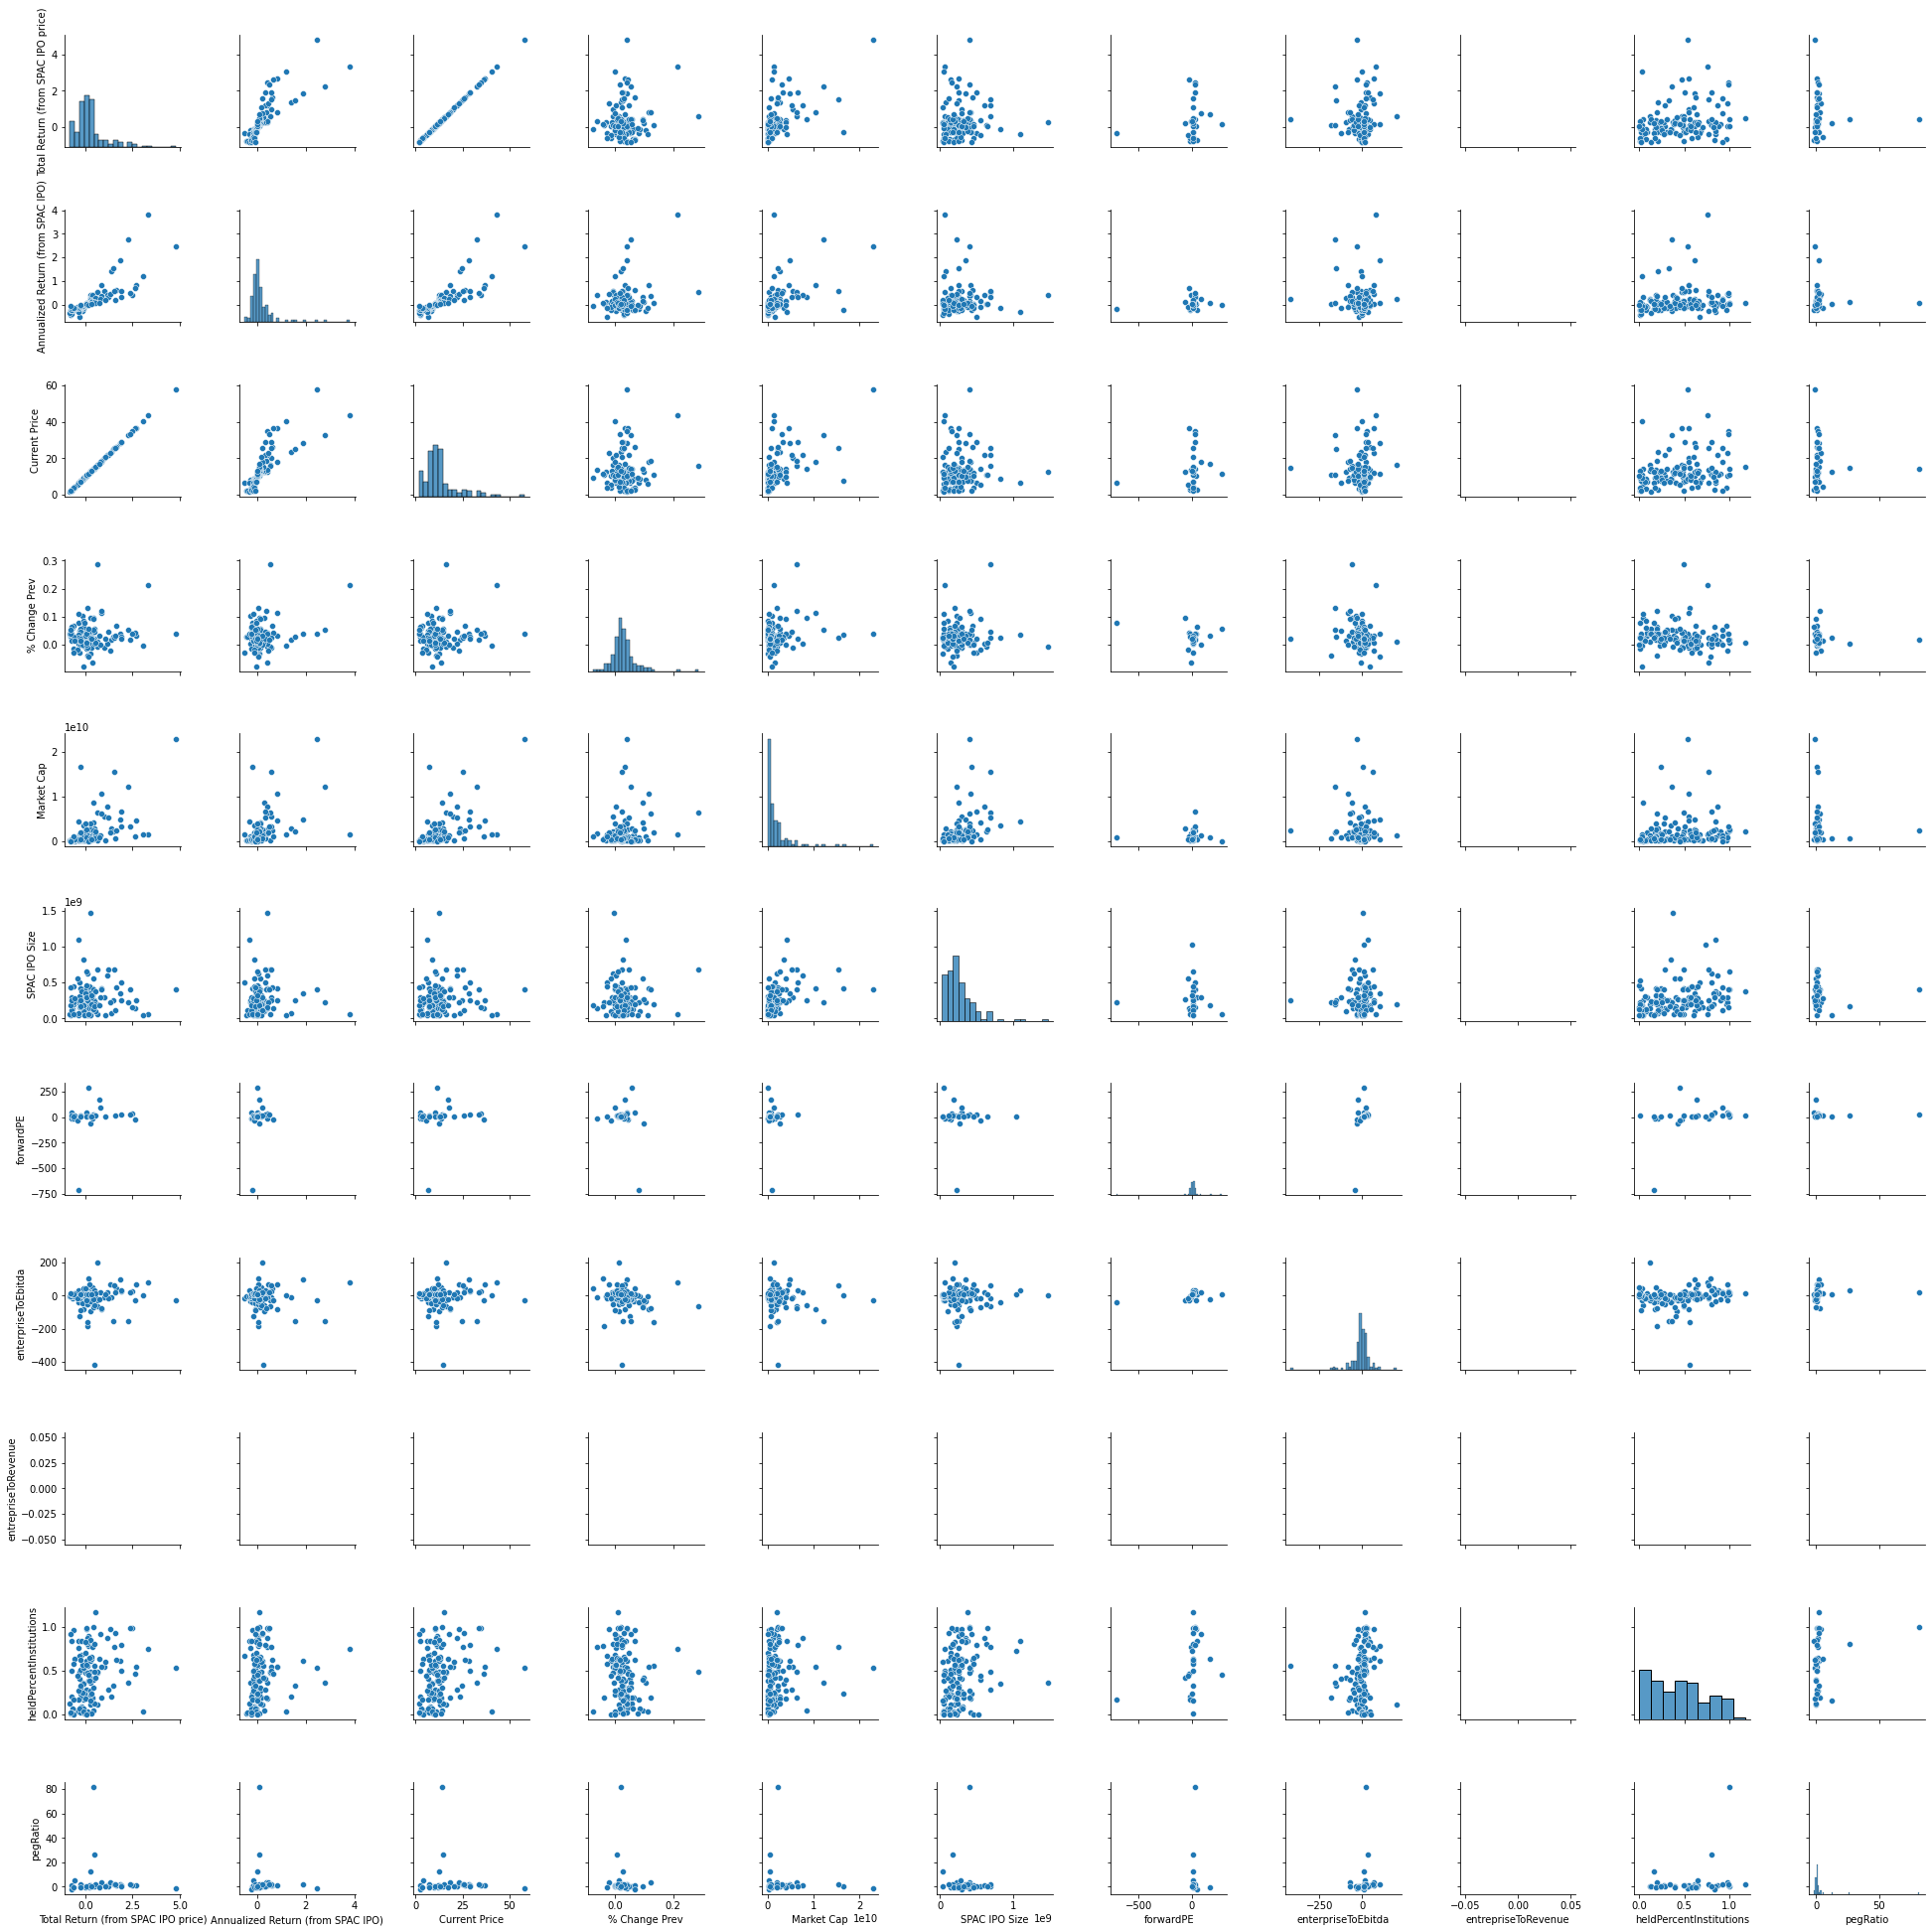

In [49]:
#We can repeat these actions. But I want to observe the data in a visulized way and perhaps we can find out some rules. I really love seaborn and its pairplot function
sns.pairplot(df)

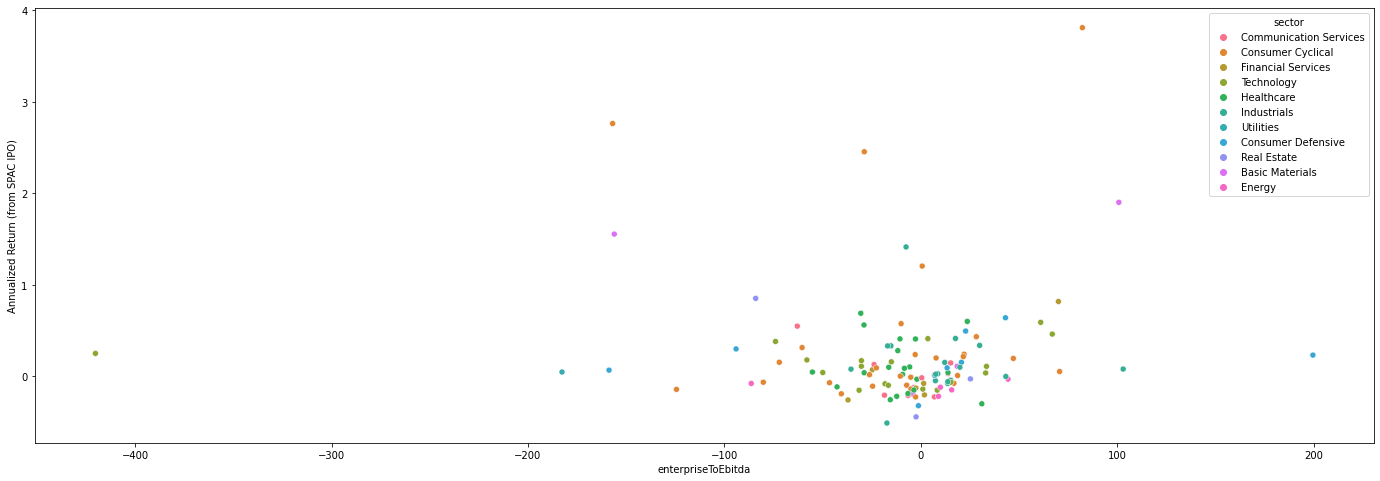

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,8))
sns.scatterplot(x='enterpriseToEbitda',y='Annualized Return (from SPAC IPO)',hue='sector',data=df)

# In the next notebook, we can use this dataset to do cooler visualization and deeper analysis